## 导入数据

In [1]:
use "/Users/mac/Stata/chenqiang/nerlove.dta",clear 

(Nerlove 1963 paper)


### 日期数据的导入

In [ ]:
gen newvar = date(varname,"YMD")

In [ ]:
gen newvar = monthly(varname,"YM")

In [ ]:
gen newvar = quarterly(varname,"YQ")

In [ ]:
gen newvar = mdy(M,D,Y)

### 变量加标签

In [25]:
label data "Nerlove 1963 paper"

## 审视数据

In [13]:
list q in 1/5


     +---+
     | q |
     |---|
  1. | 2 |
  2. | 3 |
  3. | 4 |
  4. | 4 |
  5. | 5 |
     +---+


In [2]:
des // 数据概览


Contains data from /Users/mac/Stata/chenqiang/nerlove.dta
  obs:           145                          Nerlove 1963 paper
 vars:            10                          12 Mar 2015 20:32
 size:         5,220                          
--------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
--------------------------------------------------------------------------------
tc              float   %9.0g                 total cost
q               int     %8.0g                 total output
pl              float   %9.0g                 price of labor
pf              float   %9.0g                 price of fuel
pk              int     %8.0g                 user cost of capital
lntc            float   %9.0g                 log(tc)
lnq             float   %9.0g                 log(q)
lnpf            float   %9.0g                 log(pf)
lnpk            float   %9.0g       

## 统计特征查看

In [3]:
summarize // 查看统计特征 


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
          tc |        145     12.9761    19.79458       .082    139.422
           q |        145    2133.083    2931.942          2      16719
          pl |        145    1.976552    .2300404        1.5        2.3
          pf |        145    26.17655    7.876071       10.3       42.8
          pk |        145    174.4966    18.20948        138        233
-------------+---------------------------------------------------------
        lntc |        145    1.724663    1.421723  -2.501036   4.937505
         lnq |        145    6.556651    1.912792   .6931472   9.724301
        lnpf |        145    3.208858    .3589002   2.332144   3.756538
        lnpk |        145    5.156777    .1003898   4.927254   5.451038
        lnpl |        145    .6743732    .1197522   .4054651   .8329091


In [4]:
su q, detail 


                        total output
-------------------------------------------------------------
      Percentiles      Smallest
 1%            3              2
 5%           13              3
10%           43              4       Obs                 145
25%          279              4       Sum of Wgt.         145

50%         1109                      Mean           2133.083
                        Largest       Std. Dev.      2931.942
75%         2507          11477
90%         5819          11796       Variance        8596285
95%         8642          14359       Skewness       2.398202
99%        14359          16719       Kurtosis       9.474916


In [5]:
su q if q >= 10000


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
           q |          4    13587.75    2453.921      11477      16719


In [6]:
tabulate  pl // 列联表


   price of |
      labor |      Freq.     Percent        Cum.
------------+-----------------------------------
        1.5 |          7        4.83        4.83
        1.6 |          4        2.76        7.59
        1.7 |         15       10.34       17.93
        1.8 |         26       17.93       35.86
        1.9 |         12        8.28       44.14
          2 |         12        8.28       52.41
        2.1 |         32       22.07       74.48
        2.2 |         17       11.72       86.21
        2.3 |         20       13.79      100.00
------------+-----------------------------------
      Total |        145      100.00


In [7]:
pwcorr pl pf pk,sig star(.05) //相关系数，显著性水平0.05 加星


             |       pl       pf       pk
-------------+---------------------------
          pl |   1.0000 
             |
             |
          pf |   0.3310*  1.0000 
             |   0.0000
             |
          pk |  -0.1845*  0.1254   1.0000 
             |   0.0263   0.1328
             |


## 画图

(bin=17, start=2, width=1000)
(note: scheme plotplain not found, using s2color)


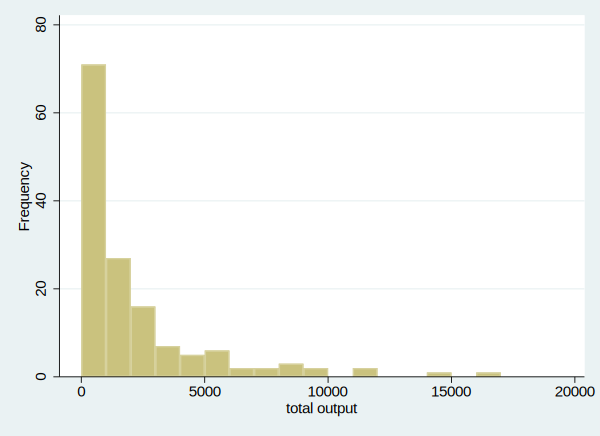

In [8]:
hist q, width(1000) frequency //直方图

(note: scheme plotplain not found, using s2color)


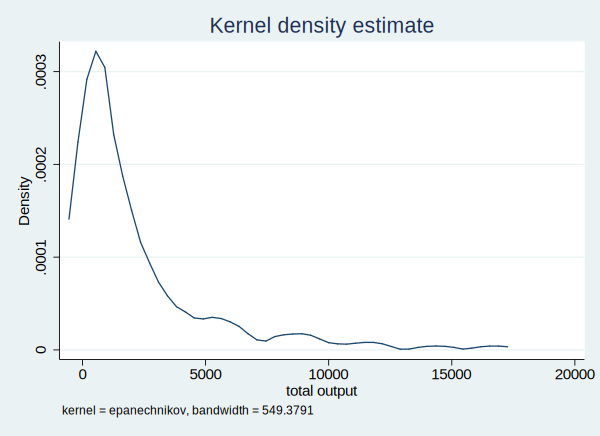

In [9]:
kdensity q //核密度图

(note: scheme plotplain not found, using s2color)


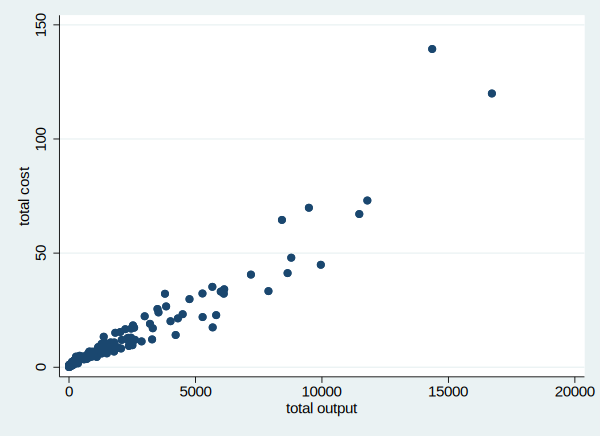

In [10]:
scatter tc q //散点图

In [11]:
gen n = _n


(note: scheme plotplain not found, using s2color)


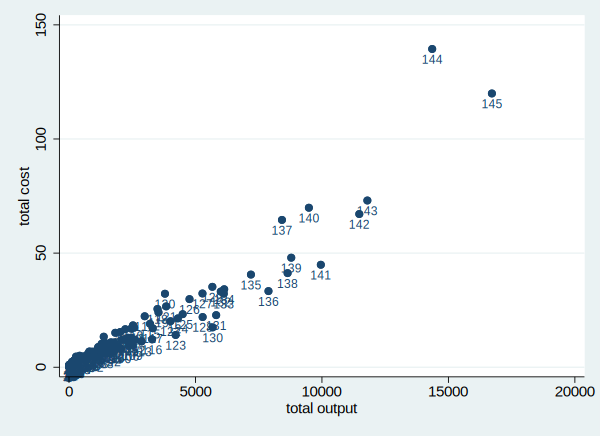

In [12]:
scatter tc q, mlabel(n) mlabpos(6) // 以n作为标签，显示在6点钟方向

(note: scheme plotplain not found, using s2color)


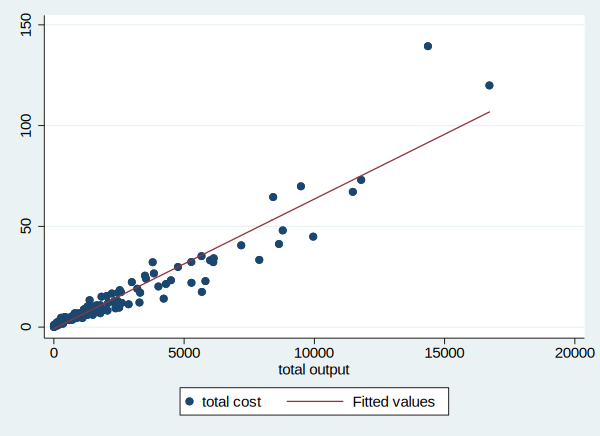

In [14]:
twoway (scatter tc q) (lfit tc q) // 同时画出散点图和线性拟合

In [15]:
graph save scatter1 // 将图形另存为文件，方便调用

(file scatter1.gph saved)


(note: scheme plotplain not found, using s2color)


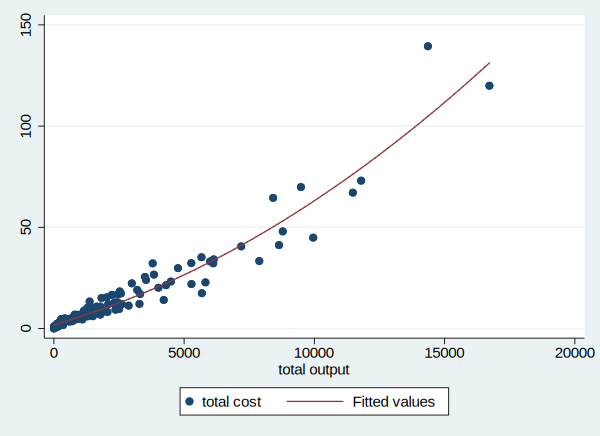

In [16]:
twoway (scatter tc q) (qfit tc q) // 同时画出散点图和二次拟合

In [17]:
graph save scatter2

(file scatter2.gph saved)


(note: scheme plotplain not found, using s2color)
(note: scheme plotplain not found, using s2color)
(note: scheme plotplain not found, using s2color)


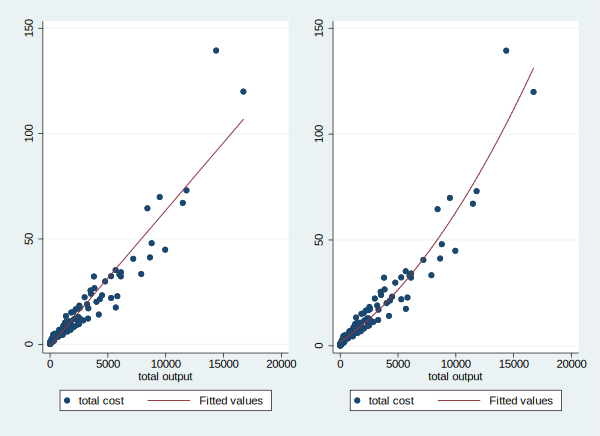

In [18]:
graph combine scatter1.gph scatter2.gph // 图片拼接

## 生成新变量

In [20]:
g lntc = log(tc),replace

variable lntc already defined


r(110);


In [21]:
g q2 = q^2

In [22]:
g lnplpk = lnpl*lnpk 

In [23]:
g larg = (q >= 10000)

In [24]:
rename larg large

## 计算器功能

In [26]:
disp log(2)

.69314718


In [27]:
dis normal(1.96) // 标准正态累计分布函数

.9750021


In [ ]:

display x[12] //显示 x 的第十二个观察值

display chi2(n,x) //自由度为 n 的累计卡方分布

display chi2tail(n,x) //自由度为 n 的反向累计卡方分布， chi2tail(n,x)=1-chi2(n,x) 

display invchi2(n,p) //卡方分布的逆运算，若 chi2(n,x)=p ，那么 invchi2(n,p)=x 

display invchi2tail(n,p) // chi2tail 的逆运算

display F(n1,n2,f) //分子、分母自由度分别为 n1 和 n2 的累计 F 分布

display Ftail(n1,n2,f) //分子、分母自由度分别为 n1 和 n2 的反向累计 F 分布

display invF(n1,n2,P) // F 分布的逆运算，若 F(n1,n2,f)=p ，那么 invF(n1,n2,p)=f 

display invFtail(n1,n2,p) // Ftail 的逆运算

display tden(n,t) //自由度为 n 的 t 分布

display ttail(n,t) //自由度为 n 的反向累计 t 分布

display invttail(n,p) // ttail 的逆运算

In [28]:
help density function 

In [ ]:
/*Functions

    The probability distribution and density functions are organized under the
    following headings:

        Beta and noncentral beta distributions
        Binomial distribution
        Cauchy distribution
        Chi-squared and noncentral chi-squared distributions
        Dunnett's multiple range distribution
        Exponential distribution
        F and noncentral F distributions
        Gamma distribution
        Hypergeometric distribution
        Inverse Gaussian distribution
        Laplace distribution
        Logistic distribution
        Negative binomial distribution
        Normal (Gaussian), binormal, and multivariate normal distributions
        Poisson distribution
        Student's t and noncentral Student's t distributions
        Tukey's Studentized range distribution
        Weibull distribution
        Weibull (proportional hazards) distribution
        Wishart distribution
/*

## 线性回归

In [29]:
regress lntc lnq lnpl lnpk lnpf


      Source |       SS           df       MS      Number of obs   =       145
-------------+----------------------------------   F(4, 140)       =    437.90
       Model |  269.524728         4  67.3811819   Prob > F        =    0.0000
    Residual |  21.5420958       140  .153872113   R-squared       =    0.9260
-------------+----------------------------------   Adj R-squared   =    0.9239
       Total |  291.066823       144  2.02129738   Root MSE        =    .39227

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      0.721      0.017    41.35   0.000        0.686       0.755
        lnpl |      0.456      0.300     1.52   0.131       -0.137       1.049
        lnpk |     -0.215      0.340    -0.63   0.528       -0.887       0.457
        lnpf |      0.426      0.100     4.24   0.

In [30]:
vce // 显示估计系数的协方差矩阵


Covariance matrix of coefficients of regress model

        e(V) |        lnq        lnpl        lnpk        lnpf       _cons 
-------------+------------------------------------------------------------
         lnq |  .00030393                                                 
        lnpl | -.00035938   .08988127                                     
        lnpk |  .00034967   .02497537   .11548412                         
        lnpf |  .00030089  -.01124831  -.00669535   .01006447             
       _cons | -.00451909  -.15095534  -.59317676   .00784373   3.1662023 


In [31]:
regress lntc lnq lnpl lnpk lnpf, noc // 无常数项回归


      Source |       SS           df       MS      Number of obs   =       145
-------------+----------------------------------   F(4, 141)       =   1113.80
       Model |  700.203755         4  175.050939   Prob > F        =    0.0000
    Residual |  22.1602671       141  .157165015   R-squared       =    0.9693
-------------+----------------------------------   Adj R-squared   =    0.9685
       Total |  722.364022       145  4.98182084   Root MSE        =    .39644

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      0.716      0.017    41.07   0.000        0.681       0.750
        lnpl |      0.286      0.291     0.98   0.327       -0.289       0.860
        lnpk |     -0.883      0.067   -13.24   0.000       -1.015      -0.751
        lnpf |      0.435      0.101     4.29   0.

In [32]:
reg lntc lnq lnpl lnpk lnpf if q >= 6000 // 针对“大企业”回归


      Source |       SS           df       MS      Number of obs   =        14
-------------+----------------------------------   F(4, 9)         =     17.43
       Model |  2.58684888         4  .646712221   Prob > F        =    0.0003
    Residual |  .333945243         9  .037105027   R-squared       =    0.8857
-------------+----------------------------------   Adj R-squared   =    0.8349
       Total |  2.92079413        13  .224676471   Root MSE        =    .19263

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      1.212      0.196     6.20   0.000        0.770       1.655
        lnpl |      0.692      0.518     1.33   0.215       -0.481       1.865
        lnpk |      0.246      0.568     0.43   0.675       -1.038       1.531
        lnpf |      0.157      0.434     0.36   0.

In [33]:
reg lntc lnq lnpl lnpk lnpf if large // 同上

note: lnpl omitted because of collinearity

      Source |       SS           df       MS      Number of obs   =         4
-------------+----------------------------------   F(3, 0)         =         .
       Model |  .391210119         3  .130403373   Prob > F        =         .
    Residual |           0         0           .   R-squared       =    1.0000
-------------+----------------------------------   Adj R-squared   =         .
       Total |  .391210119         3  .130403373   Root MSE        =         0

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      1.640          .        .       .            .           .
             |
        lnpk |      0.603          .        .       .            .           .
        lnpf |      0.679          .        .       .            .     

In [34]:
reg lntc lnq lnpl lnpk lnpf if large == 0


      Source |       SS           df       MS      Number of obs   =       141
-------------+----------------------------------   F(4, 136)       =    409.64
       Model |  237.960442         4  59.4901104   Prob > F        =    0.0000
    Residual |  19.7506069       136  .145225051   R-squared       =    0.9234
-------------+----------------------------------   Adj R-squared   =    0.9211
       Total |  257.711048       140   1.8407932   Root MSE        =    .38108

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      0.705      0.018    40.15   0.000        0.670       0.740
        lnpl |      0.286      0.296     0.97   0.334       -0.298       0.871
        lnpk |     -0.282      0.341    -0.83   0.410       -0.957       0.392
        lnpf |      0.414      0.098     4.23   0.

In [35]:
reg lntc lnq lnpl lnpk lnpf if ~large // "~"表示“非”


      Source |       SS           df       MS      Number of obs   =       141
-------------+----------------------------------   F(4, 136)       =    409.64
       Model |  237.960442         4  59.4901104   Prob > F        =    0.0000
    Residual |  19.7506069       136  .145225051   R-squared       =    0.9234
-------------+----------------------------------   Adj R-squared   =    0.9211
       Total |  257.711048       140   1.8407932   Root MSE        =    .38108

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      0.705      0.018    40.15   0.000        0.670       0.740
        lnpl |      0.286      0.296     0.97   0.334       -0.298       0.871
        lnpk |     -0.282      0.341    -0.83   0.410       -0.957       0.392
        lnpf |      0.414      0.098     4.23   0.

### 拟合值

In [36]:
predict lntchat // 计算拟合值

(option xb assumed; fitted values)


In [40]:
list lntchat lntc 


     +------------------------+
     |    lntchat        lntc |
     |------------------------|
  1. |  -2.557889   -2.501036 |
  2. | -1.9792911   -.4140014 |
  3. | -1.7715349   -.0100503 |
  4. | -1.8429826   -1.155183 |
  5. | -1.7861969   -1.624552 |
     |------------------------|
  6. | -1.3214942   -2.322788 |
  7. | -1.1200918   -.0523465 |
  8. | -.90347259   -.3930426 |
  9. | -.97691951   -.6443571 |
 10. | -1.0083449   -.6911492 |
     |------------------------|
 11. |  -.7561742     .177309 |
 12. | -.48229528   -.4004775 |
 13. | -.53031613   -1.052683 |
 14. | -.29210057   -.8603831 |
 15. | -.05745465   -.6911492 |
     |------------------------|
 16. | -.36181773    -.597837 |
 17. |  .15891849   -.2294131 |
 18. |  .31178948   -.4094732 |
 19. |   .3369081   -.3495575 |
 20. |  .30594234   -.1020327 |
     |------------------------|
 21. |  .51878527    .4081282 |
 22. |  .39138459     .479335 |
 23. |  .42001953    .1195592 |
 24. |  .36944338   -.3312857 |
 25. | 

In [41]:
predict e1，residual

(option xb assumed; fitted values)


In [42]:
display 1/_b[lnq]

1.4182174


### 联合检验

In [43]:
test lnq=1


 ( 1)  lnq = 1

       F(  1,   136) =  281.99
            Prob > F =    0.0000


In [44]:
test (lnq=1)(lnpl+lnpk+lnpf=1)


 ( 1)  lnq = 1
 ( 2)  lnpl + lnpk + lnpf = 1

       F(  2,   136) =  141.02
            Prob > F =    0.0000


In [45]:
test lnpl lnpk 


 ( 1)  lnpl = 0
 ( 2)  lnpk = 0

       F(  2,   136) =    1.08
            Prob > F =    0.3413


In [46]:
testnl _b[lnpl] = _b[lnq]^2 // 非线性假设检验


  (1)  _b[lnpl] = _b[lnq]^2

               chi2(1) =        0.50
           Prob > chi2 =        0.4787


(note: scheme plotplain not found, using s2color)


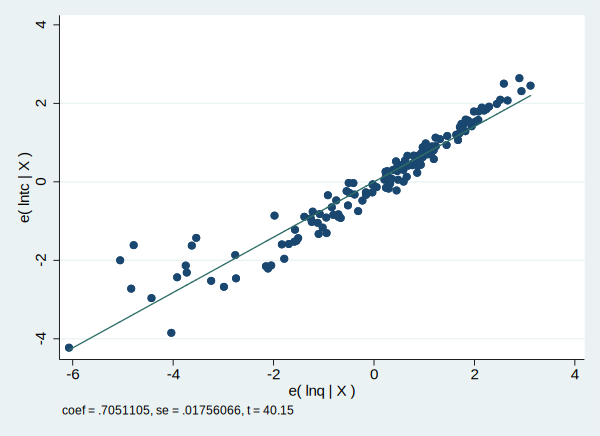

In [47]:
avplot lnq // 新增变量图

(note: scheme plotplain not found, using s2color)
(note: scheme plotplain not found, using s2color)
(note: scheme plotplain not found, using s2color)
(note: scheme plotplain not found, using s2color)
(note: scheme plotplain not found, using s2color)


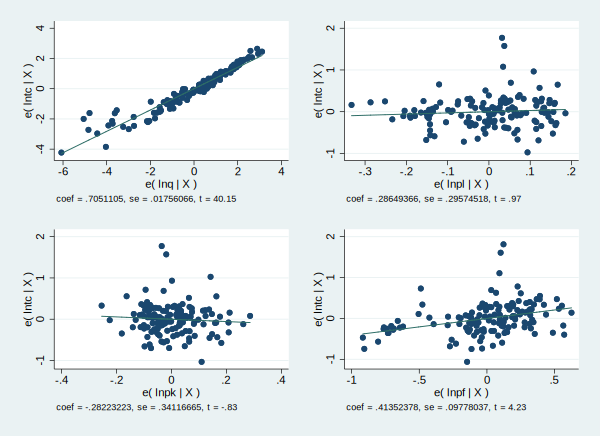

In [48]:
avplots

## 约束回归

In [50]:
constraint def 1 lnpl+lnpk+lnpf=1

In [51]:
cnsreg lntc lnq lnpl lnpk lnpf, c(1)


Constrained linear regression                   Number of obs     =        145
                                                Root MSE          =     0.3915

 ( 1)  lnpl + lnpk + lnpf = 1
------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      0.721      0.017    41.48   0.000        0.687       0.756
        lnpl |      0.606      0.207     2.93   0.004        0.197       1.016
        lnpk |     -0.021      0.193    -0.11   0.914       -0.403       0.361
        lnpf |      0.414      0.099     4.19   0.000        0.219       0.610
       _cons |     -4.636      0.895    -5.18   0.000       -6.405      -2.867
------------------------------------------------------------------------------


In [52]:
cons def 2 lnq=1

In [54]:
cnsreg lntc lnq lnpl lnpk lnpf, c(1 2)


Constrained linear regression                   Number of obs     =        145
                                                Root MSE          =     0.6553

 ( 1)  lnpl + lnpk + lnpf = 1
 ( 2)  lnq = 1
------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      1.000  (constrained)
        lnpl |      0.156      0.344     0.45   0.651       -0.523       0.835
        lnpk |      0.144      0.323     0.45   0.656       -0.494       0.783
        lnpf |      0.700      0.163     4.30   0.000        0.378       1.021
       _cons |     -7.927      1.458    -5.44   0.000      -10.809      -5.045
------------------------------------------------------------------------------


## stata 命令的存储与调用

**所有的Stata命令可以分为两种，即e-类命令与r-类命令。**

In [55]:
sum q


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
           q |        145    2133.083    2931.942          2      16719


In [56]:
return list


scalars:
                r(sum) =  309297
                r(max) =  16719
                r(min) =  2
                 r(sd) =  2931.942131040467
                r(Var) =  8596284.659770114
               r(mean) =  2133.08275862069
              r(sum_w) =  145
                  r(N) =  145


In [57]:
display r(sd)/r(mean)

1.3745093


In [58]:
reg tc q 


      Source |       SS           df       MS      Number of obs   =       145
-------------+----------------------------------   F(1, 143)       =   1399.00
       Model |  51190.3707         1  51190.3707   Prob > F        =    0.0000
    Residual |  5232.46776       143  36.5906836   R-squared       =    0.9073
-------------+----------------------------------   Adj R-squared   =    0.9066
       Total |  56422.8385       144  391.825267   Root MSE        =     6.049

------------------------------------------------------------------------------
          tc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
           q |      0.006      0.000    37.40   0.000        0.006       0.007
       _cons |     -0.741      0.622    -1.19   0.235       -1.971       0.488
------------------------------------------------------------------------------


In [59]:
ereturn list 


scalars:
                  e(N) =  145
               e(df_m) =  1
               e(df_r) =  143
                  e(F) =  1399.000119377508
                 e(r2) =  .9072633016022542
               e(rmse) =  6.049023360142635
                e(mss) =  51190.37074066489
                e(rss) =  5232.467756451834
               e(r2_a) =  .9066147932218505
                 e(ll) =  -465.7241671687837
               e(ll_0) =  -638.1285147616334
               e(rank) =  2

macros:
            e(cmdline) : "regress tc q"
              e(title) : "Linear regression"
          e(marginsok) : "XB default"
                e(vce) : "ols"
             e(depvar) : "tc"
                e(cmd) : "regress"
         e(properties) : "b V"
            e(predict) : "regres_p"
              e(model) : "ols"
          e(estat_cmd) : "regress_estat"

matrices:
                  e(b) :  1 x 2
                  e(V) :  2 x 2

functions:
             e(sample)   


## 命令库管理

In [ ]:
update all

In [ ]:
ssc new

In [ ]:
ssc hot

In [ ]:
ssc install newcommand

In [ ]:
search keyward // 搜索本地

In [ ]:
findit keyward // 搜索本地及网络

In [60]:
sysdir 

   STATA:  /Applications/Stata15/
    BASE:  /Applications/Stata15/ado/base/
    SITE:  /Applications/Stata15/ado/site/
    PLUS:  /Applications/Stata15/ado\plus/
PERSONAL:  /Applications/Stata15/ado\personal/
OLDPLACE:  ~/ado/


## 大样本OLS

### 大样本OLS的假定
- 假定5.1：线性假定
$$y_i=x'_i\beta + \varepsilon \tag{5.6}$$
- 假定5.2：${y_i,x_i}$为渐进独立的平稳过程
- 假定5.3；前定解释变量（$x_i与\varepsilon_i不相关$）
- 假设5.4：秩条件（$E(x_ix_i')$为非退化矩阵）
- 假定5.5：$g_i$为鞅差分序列，且其协方差矩阵$S=E(g_i,g_i')$为非退化矩阵。


In [64]:
reg lntc lnq lnpl lnpk lnpf


      Source |       SS           df       MS      Number of obs   =       145
-------------+----------------------------------   F(4, 140)       =    437.90
       Model |  269.524728         4  67.3811819   Prob > F        =    0.0000
    Residual |  21.5420958       140  .153872113   R-squared       =    0.9260
-------------+----------------------------------   Adj R-squared   =    0.9239
       Total |  291.066823       144  2.02129738   Root MSE        =    .39227

------------------------------------------------------------------------------
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      0.721      0.017    41.35   0.000        0.686       0.755
        lnpl |      0.456      0.300     1.52   0.131       -0.137       1.049
        lnpk |     -0.215      0.340    -0.63   0.528       -0.887       0.457
        lnpf |      0.426      0.100     4.24   0.

In [65]:
test lnq = 1


 ( 1)  lnq = 1

       F(  1,   140) =  256.27
            Prob > F =    0.0000


In [66]:
reg lntc lnq lnpl lnpk lnpf, robust 


Linear regression                               Number of obs     =        145
                                                F(4, 140)         =     177.19
                                                Prob > F          =     0.0000
                                                R-squared         =     0.9260
                                                Root MSE          =     .39227

------------------------------------------------------------------------------
             |               Robust
        lntc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         lnq |      0.721      0.033    22.16   0.000        0.657       0.785
        lnpl |      0.456      0.260     1.75   0.082       -0.059       0.971
        lnpk |     -0.215      0.323    -0.67   0.507       -0.854       0.424
        lnpf |      0.426      0.074     5.75   0.000        0.279       0.572
       _cons |

In [67]:
test lnq = 1


 ( 1)  lnq = 1

       F(  1,   140) =   73.57
            Prob > F =    0.0000


In [70]:
testnl _b[lnpl] = _b[lnq]^2


  (1)  _b[lnpl] = _b[lnq]^2

               chi2(1) =        0.05
           Prob > chi2 =        0.8161


## MLE 估计法

### 正态分布检验

In [79]:
sysuse auto,clear

(1978 Automobile Data)


(bin=8, start=12, width=3.625)
(note: scheme plotplain not found, using s2color)


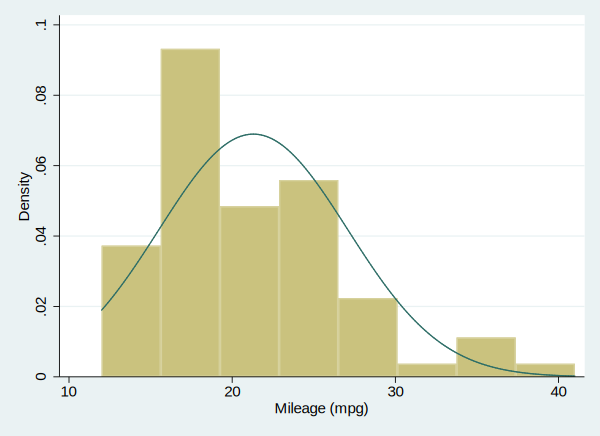

In [72]:
hist mpg,normal // 画出直方图，并与正态分布比较

(note: scheme plotplain not found, using s2color)


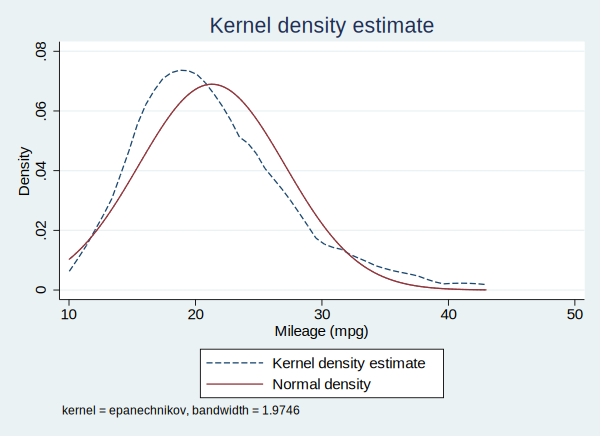

In [73]:
kdensity mpg, normal lpattern("-") // 画核密度图，并与正态分布比较

(note: scheme plotplain not found, using s2color)


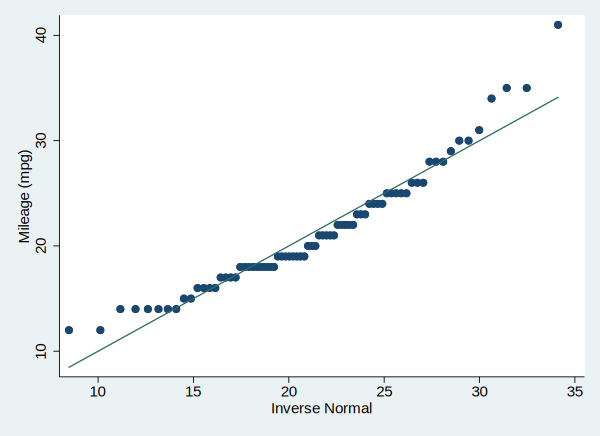

In [74]:
qnorm mpg // 画QQ图

In [75]:
su mpg, detail // 显示偏度与峰度


                        Mileage (mpg)
-------------------------------------------------------------
      Percentiles      Smallest
 1%           12             12
 5%           14             12
10%           14             14       Obs                  74
25%           18             14       Sum of Wgt.          74

50%           20                      Mean            21.2973
                        Largest       Std. Dev.      5.785503
75%           25             34
90%           29             35       Variance       33.47205
95%           34             35       Skewness       .9487176
99%           41             41       Kurtosis       3.975005


In [80]:
di (r(N)/6)*((r(skewness)^2)+[(1/4)*(r(kurtosis)-3)^2])

.


In [81]:
jb6 mpg

Jarque-Bera normality test:  14.03 Chi(2)  9.0e-04
Jarque-Bera test for Ho: normality: (mpg)


In [82]:
di chi2tail(2,14.031924)

.00089744


In [83]:
sktest mpg 


                    Skewness/Kurtosis tests for Normality
                                                          ------ joint ------
    Variable |        Obs  Pr(Skewness)  Pr(Kurtosis) adj chi2(2)   Prob>chi2
-------------+---------------------------------------------------------------
         mpg |         74     0.0015        0.0804       10.95         0.0042


In [84]:
swilk mpg 


                   Shapiro-Wilk W test for normal data

    Variable |        Obs       W           V         z       Prob>z
-------------+------------------------------------------------------
         mpg |         74    0.94821      3.335     2.627    0.00430


In [85]:
gen lnmpg = log(mpg)

In [86]:
jb6 lnmpg

Jarque-Bera normality test:  .8632 Chi(2)  .6495
Jarque-Bera test for Ho: normality: (lnmpg)


In [87]:
sktest lnmpg 


                    Skewness/Kurtosis tests for Normality
                                                          ------ joint ------
    Variable |        Obs  Pr(Skewness)  Pr(Kurtosis) adj chi2(2)   Prob>chi2
-------------+---------------------------------------------------------------
       lnmpg |         74     0.3586        0.9446        0.87         0.6474


(note: scheme plotplain not found, using s2color)


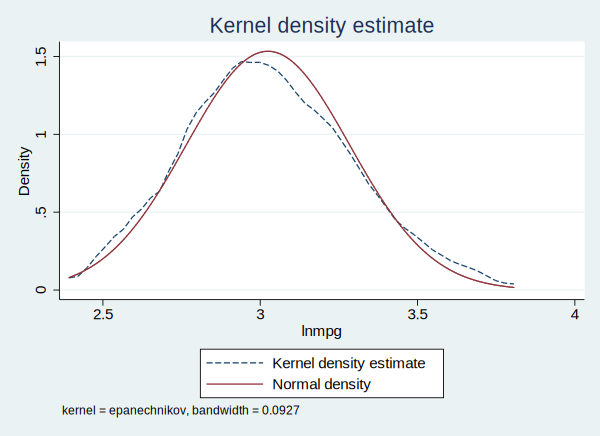

In [88]:
kdensity lnmpg, normal lpattern("-") // 画核密度图，并与正态分布比较